In [61]:
import nltk

In [62]:
# nltk.download() 하면 관련 패키지들 선택적 다운 가능
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [63]:
#불용어 사전 로딩
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

In [72]:
data1 = '''I got my peaches out in Georgia (oh, yeah, shit)
I get my weed from California (that's that shit)
I took my chick up to the North, yeah (badass bitch)
I get my light right from the source, yeah (yeah, that's it)
And I see you (oh), the way I breathe you in (in)
It's the texture of your skin
I wanna wrap my arms around you, baby
Never let you go, oh
And I say, oh, there's nothing like your touch
It's the way you lift me up, yeah
And I'll be right here with you 'til the end
I got my peaches out in Georgia (oh, yeah, shit)
I get my weed from California (that's that shit)
I took my chick up to the North, yeah (badass bitch)
I get my light right from the source, yeah (yeah, that's it)
You ain't sure yet, but I'm for ya
All I could want, all I can wish for
Nights…'''

In [87]:
#data2 = nltk.word_tokenize(data1)
# word_tokenize 함수는 축약형 정확 분리 불가능 / 이렇게 따라하자
from nltk.tokenize import WordPunctTokenizer

tokenizer = WordPunctTokenizer()
new_data2 = tokenizer.tokenize(data1) # 형태소분석
# 축약형의 경우 축약된 단어 분리하지 말고 출력하고 싶을 경우 정규식 쓰면됨
from nltk.tokenize.regexp import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w']+")
new_data3 = tokenizer.tokenize(data1)

# 추출된 단어별 상세 품사 검색 함수
data3 = nltk.pos_tag(new_data2)

In [79]:
# 불용어 제거하기
data4 = [ each_word for each_word in new_data3
        if each_word not in stopwords.words() ]

In [77]:
# 단어별 언급빈도 집계
from collections import Counter

data5 = Counter(data4) # 타입은 counter
data6 = data5.most_common(100) # 타입은 list
data7 = dict(data6) # 타입은 dict

[('I', 14),
 ('yeah', 9),
 ('oh', 5),
 ('shit', 4),
 ('get', 4),
 ("that's", 4),
 ('right', 3),
 ('And', 3),
 ('got', 2),
 ('peaches', 2),
 ('Georgia', 2),
 ('weed', 2),
 ('California', 2),
 ('took', 2),
 ('chick', 2),
 ('North', 2),
 ('badass', 2),
 ('bitch', 2),
 ('light', 2),
 ('source', 2),
 ('way', 2),
 ("It's", 2),
 ('see', 1),
 ('breathe', 1),
 ('texture', 1),
 ('skin', 1),
 ('wanna', 1),
 ('wrap', 1),
 ('arms', 1),
 ('around', 1),
 ('baby', 1),
 ('Never', 1),
 ('let', 1),
 ('go', 1),
 ('say', 1),
 ("there's", 1),
 ('nothing', 1),
 ('like', 1),
 ('touch', 1),
 ('lift', 1),
 ("I'll", 1),
 ("'til", 1),
 ('You', 1),
 ("ain't", 1),
 ('sure', 1),
 ('yet', 1),
 ("I'm", 1),
 ('All', 1),
 ('could', 1),
 ('wish', 1),
 ('Nights', 1)]

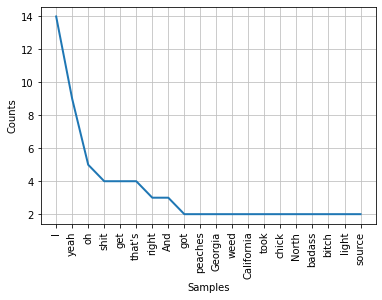

In [81]:
# 집계된 단어 그래프 표시하기
g_data4 = nltk.Text(data4 , name = '제목')
g_data4.plot(20)

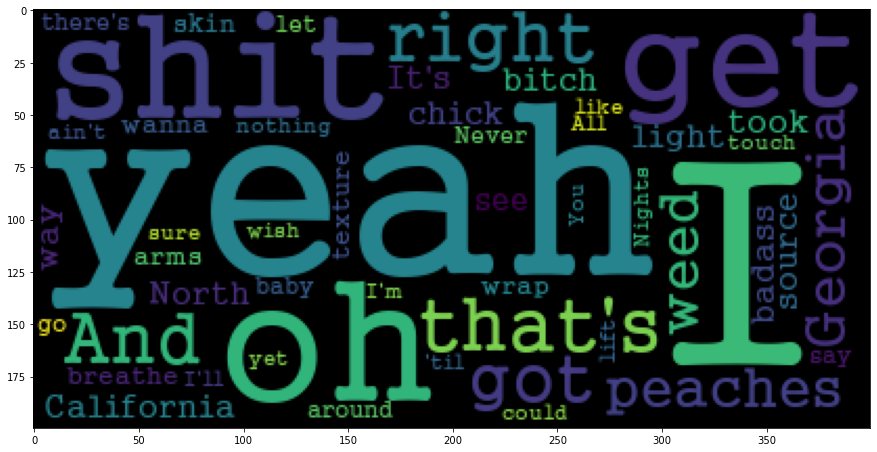

In [86]:
#워드 클라우드 그리기
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(font_path = "C:/windows/Fonts/H2GSRB.TTF",
                     relative_scaling = 0.2,
                     background_color = 'black').generate_from_frequencies(data7)
plt.figure(figsize=(15,9))
plt.imshow(wordcloud)

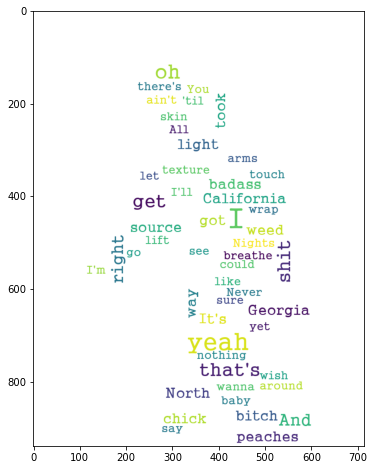

In [107]:
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator
bieber_mask = np.array(Image.open("D:/My_Jupyter/온라인 파이썬 강의/파이썬을 활용한 데이터분석 및 시각화_실습(전체)v2/8차시/bieber.jpg"))
wc = WordCloud(font_path = "C:/windows/Fonts/H2GSRB.TTF",
              relative_scaling = 0.4, mask = bieber_mask,
              background_color='white',
              min_font_size = 1,
              max_font_size = 60,
              max_words = 100).generate_from_frequencies(data7)
plt.figure(figsize = (8,8))
plt.axis('on')
plt.imshow(wc)